## Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import geopandas
import shapely.geometry as geom
import geoplot

#Install the extra libs with the following command: conda install -c conda-forge geoplot geopandas shapely

## Question:

### What are the riskiest COVID-19 infection-prone places in Seoul (where most infected people have been)? (Descriptive / Exploratory)

## Reading Data

#### [Dataset Description](https://www.kaggle.com/kimjihoo/ds4c-what-is-this-dataset-detailed-description)

#### Patient Route

In [2]:
patient_route = pd.read_csv('../data/PatientRoute.csv')

In [3]:
patient_route.head(20)

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
5,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,public_transportation,37.590330,127.015221
6,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.589590,127.009766
7,1000000002,5.0,2020-01-27,Seoul,Seongbuk-gu,restaurant,37.592057,127.018898
8,1000000002,5.0,2020-01-27,Seoul,Dongdaemun-gu,store,37.566262,127.065815
9,1000000002,5.0,2020-01-28,Seoul,Seongbuk-gu,etc,37.591669,127.018420


In [4]:
patient_route.describe()

,patient_id,global_num,latitude,longitude
count,5.963000e+03,3154.000000,5963.000000,5963.000000
mean,2.492088e+09,6303.317058,36.744703,127.627235
std,1.951605e+09,3590.101111,0.935144,0.908103
min,1.000000e+09,2.000000,33.454642,126.301005
25%,1.000000e+09,2818.000000,35.871435,126.940584
50%,1.100000e+09,7688.000000,37.342219,127.106542
75%,4.100000e+09,9080.500000,37.515846,128.597562
max,6.100000e+09,10659.000000,38.193169,129.475746


In [5]:
patient_route.describe(include=['object'])

,date,province,city,type
count,5963,5963,5963,5963
unique,89,16,149,23
top,2020-02-24,Seoul,Cheonan-si,hospital
freq,322,2256,465,1790


In [6]:
places_per_patient = patient_route.groupby('patient_id').type.count()

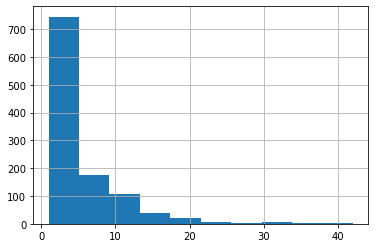

In [7]:
places_per_patient.hist();

#### Matching to Patient Info data

In [8]:
patient_info = pd.read_csv('../data/PatientInfo.csv')

In [9]:
patient_info.head(20)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
5,1000000006,10.0,female,1966.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,43.0,NaN,2020-01-31,2020-02-19,NaN,released
6,1000000007,11.0,male,1995.0,20s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,0.0,NaN,2020-01-31,2020-02-10,NaN,released
7,1000000008,13.0,male,1992.0,20s,Korea,Seoul,etc,NaN,overseas inflow,1.0,NaN,0.0,NaN,2020-02-02,2020-02-24,NaN,released
8,1000000009,19.0,male,1983.0,30s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,2.0,NaN,68.0,NaN,2020-02-05,2020-02-21,NaN,released
9,1000000010,21.0,female,1960.0,60s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,3.0,1.000000e+09,6.0,NaN,2020-02-05,2020-02-29,NaN,released


In [10]:
keep_same = {'patient_id', 'global_num'}
patient_route.columns = ['{}{}'.format('' if c in keep_same else 'route_', c) for c in patient_route.columns]

In [11]:
patient_route.head()

,patient_id,global_num,route_date,route_province,route_city,route_type,route_latitude,route_longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534


In [12]:
patient_info_route = pd.merge(patient_info, patient_route)

In [13]:
patient_info_route.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,confirmed_date,released_date,deceased_date,state,route_date,route_province,route_city,route_type,route_latitude,route_longitude
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,2020-01-23,2020-02-05,NaN,released,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,2020-01-23,2020-02-05,NaN,released,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-01-30,2020-03-02,NaN,released,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-01-30,2020-03-02,NaN,released,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-01-30,2020-03-02,NaN,released,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534


In [14]:
patient_info_route.shape

(5963, 24)

### Check whether route steps occur after confirmed date

In [15]:
print(patient_info_route[patient_info_route['confirmed_date'] < patient_info_route['route_date']].shape[0]/patient_info_route.shape[0])
print(patient_info_route[patient_info_route['confirmed_date'] > patient_info_route['route_date']].shape[0]/patient_info_route.shape[0])
print(patient_info_route[patient_info_route['confirmed_date'] == patient_info_route['route_date']].shape[0]/patient_info_route.shape[0])
patient_info_route[patient_info_route['confirmed_date'] >= patient_info_route['route_date']]

0.014757672312594332
0.8753982894516183
0.10984403823578735


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,confirmed_date,released_date,deceased_date,state,route_date,route_province,route_city,route_type,route_latitude,route_longitude
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,2020-01-23,2020-02-05,NaN,released,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
2,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-01-30,2020-03-02,NaN,released,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-01-30,2020-03-02,NaN,released,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-01-30,2020-03-02,NaN,released,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
5,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-01-30,2020-03-02,NaN,released,2020-01-26,Seoul,Seongbuk-gu,public_transportation,37.590330,127.015221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5958,6100000090,NaN,male,1980.0,40s,Korea,Gyeongsangnam-do,Yangsan-si,NaN,overseas inflow,...,2020-03-26,NaN,NaN,isolated,2020-03-24,Seoul,Gangseo-gu,airport,37.558654,126.794474
5959,6100000090,NaN,male,1980.0,40s,Korea,Gyeongsangnam-do,Yangsan-si,NaN,overseas inflow,...,2020-03-26,NaN,NaN,isolated,2020-03-24,Busan,Gangseo-gu,airport,35.173220,128.946459
5960,6100000090,NaN,male,1980.0,40s,Korea,Gyeongsangnam-do,Yangsan-si,NaN,overseas inflow,...,2020-03-26,NaN,NaN,isolated,2020-03-25,Gyeongsangnam-do,Yangsan-si,store,35.336944,129.026389
5961,6100000090,NaN,male,1980.0,40s,Korea,Gyeongsangnam-do,Yangsan-si,NaN,overseas inflow,...,2020-03-26,NaN,NaN,isolated,2020-03-25,Gyeongsangnam-do,Yangsan-si,hospital,35.335757,129.025003


As we can see above, the route data is mostly (98.5%) about the places patients have been up until the day the disease was confirmed.

#### Most common places visited by infected people

In [16]:
patient_info_route.route_type.value_counts()

hospital                       1790
etc                            1777
store                           545
restaurant                      489
public_transportation           412
pharmacy                        215
airport                         189
church                          135
cafe                             93
school                           52
pc_cafe                          46
lodging                          37
bank                             30
bakery                           24
gym                              20
real_estate_agency               16
post_office                      15
university                       14
administrative_area_level_1      14
beauty_salon                     14
bar                              13
gas_station                      12
academy                          11
Name: route_type, dtype: int64

In [17]:
def plot_categorical_col_dist(df, col_name, plot_title, first_n=-1):
    category_counts = df[col_name].value_counts()
    if (first_n != -1):
        category_counts = category_counts[:first_n]
    (category_counts/df.shape[0]).plot(kind="bar");
    plt.title(plot_title);

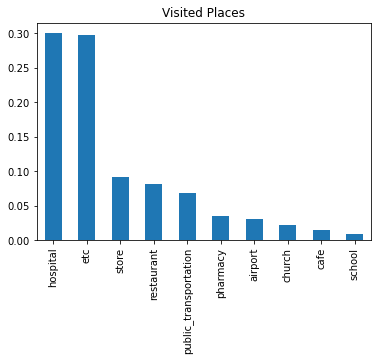

In [18]:
plot_categorical_col_dist(patient_info_route, 'route_type', 'Visited Places', 10)

#### Clustering Lat/Long data using K-means

##### Analysis will be performed only for Seoul province

In [19]:
seoul_p_route = patient_info_route[patient_info_route['route_province'] == 'Seoul']
print(seoul_p_route.shape)
seoul_p_route.head()

(2256, 24)


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,confirmed_date,released_date,deceased_date,state,route_date,route_province,route_city,route_type,route_latitude,route_longitude
1,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,2020-01-23,2020-02-05,NaN,released,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-01-30,2020-03-02,NaN,released,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-01-30,2020-03-02,NaN,released,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-01-30,2020-03-02,NaN,released,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
5,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-01-30,2020-03-02,NaN,released,2020-01-26,Seoul,Seongbuk-gu,public_transportation,37.590330,127.015221


In [20]:
X = patient_info_route[patient_info_route['route_province'] == 'Seoul'][['route_latitude', 'route_longitude']]
print(X.shape)
X.head()

(2256, 2)


,route_latitude,route_longitude
1,37.567241,127.005659
2,37.592560,127.017048
3,37.591810,127.016822
4,37.563992,127.029534
5,37.590330,127.015221


In [21]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

K = range(1,10)

  # scipy.cluster.vq.kmeans
KM = [kmeans(X,k) for k in K] # apply kmeans 1 to 10
centroids = [cent for (cent,var) in KM]   # cluster centroids

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]

cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

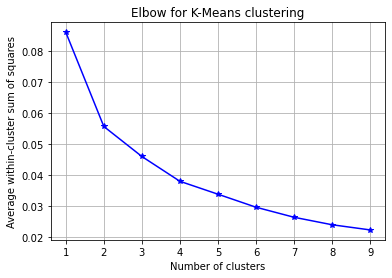

In [22]:
#kIdx = 4
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
#ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
#      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('Elbow for K-Means clustering')  

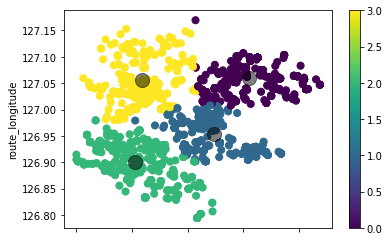

In [23]:
from sklearn.cluster import KMeans
km = KMeans(4, init='k-means++') # initialize
km.fit(X)
labels = km.predict(X) # classify into three clusters
centers = km.cluster_centers_
X.plot.scatter(x = 'route_latitude', y = 'route_longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [24]:
seoul_p_route['cluster_label'] = labels

/local/tarciso/anaconda3/envs/udacity-ds-p1/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
seoul_p_route.cluster_label.value_counts()

2    766
3    544
0    514
1    432
Name: cluster_label, dtype: int64

In [26]:
seoul_p_route.shape

(2256, 25)

In [27]:
X.shape

(2256, 2)

In [28]:
seoul_p_route[seoul_p_route['cluster_label'] == 1].head(10)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,released_date,deceased_date,state,route_date,route_province,route_city,route_type,route_latitude,route_longitude,cluster_label
1,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,2020-02-05,NaN,released,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659,1
15,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,2020-02-19,NaN,released,2020-01-26,Seoul,Jongno-gu,church,37.586288,126.999716,1
16,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,2020-02-19,NaN,released,2020-01-26,Seoul,Jongno-gu,restaurant,37.572950,126.979358,1
21,1000000008,13.0,male,1992.0,20s,Korea,Seoul,etc,NaN,overseas inflow,...,2020-02-24,NaN,released,2020-01-31,Seoul,Jung-gu,hospital,37.567241,127.005659,1
32,1000000010,21.0,female,1960.0,60s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,...,2020-02-29,NaN,released,2020-01-29,Seoul,Jongno-gu,church,37.586288,126.999716,1
33,1000000010,21.0,female,1960.0,60s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,...,2020-02-29,NaN,released,2020-01-29,Seoul,Jongno-gu,church,37.586288,126.999716,1
35,1000000010,21.0,female,1960.0,60s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,...,2020-02-29,NaN,released,2020-02-05,Seoul,Jongno-gu,hospital,37.578708,126.997551,1
36,1000000011,23.0,female,1962.0,50s,China,Seoul,Seodaemun-gu,NaN,overseas inflow,...,2020-02-29,NaN,released,2020-02-06,Seoul,Seodaemun-gu,hospital,37.578588,126.936251,1
37,1000000011,23.0,female,1962.0,50s,China,Seoul,Seodaemun-gu,NaN,overseas inflow,...,2020-02-29,NaN,released,2020-02-02,Seoul,Jung-gu,store,37.564846,126.981927,1
38,1000000011,23.0,female,1962.0,50s,China,Seoul,Seodaemun-gu,NaN,overseas inflow,...,2020-02-29,NaN,released,2020-02-02,Seoul,Seodaemun-gu,etc,37.579116,126.936779,1


In [29]:
X[['route_latitude','route_longitude']].head(10)

,route_latitude,route_longitude
1,37.567241,127.005659
2,37.592560,127.017048
3,37.591810,127.016822
4,37.563992,127.029534
5,37.590330,127.015221
6,37.589590,127.009766
7,37.592057,127.018898
8,37.566262,127.065815
9,37.591669,127.018420
10,37.588923,127.076681


#### Visualize patient route stops on map

##### Encode geographic info

In [54]:
seoul_p_route['risk_places'] = list(zip(seoul_p_route.route_longitude, seoul_p_route.route_latitude))
seoul_p_route['risk_places'] = seoul_p_route['risk_places'].apply(geom.Point)

/local/tarciso/anaconda3/envs/udacity-ds-p1/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/local/tarciso/anaconda3/envs/udacity-ds-p1/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
gdf = geopandas.GeoDataFrame(seoul_p_route, geometry='risk_places')
gdf.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,deceased_date,state,route_date,route_province,route_city,route_type,route_latitude,route_longitude,cluster_label,risk_places
1,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,NaN,released,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659,1,POINT (127.00566 37.56724)
2,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,released,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048,0,POINT (127.01705 37.59256)
3,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,released,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822,0,POINT (127.01682 37.59181)
4,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,released,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534,0,POINT (127.02953 37.56399)
5,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,released,2020-01-26,Seoul,Seongbuk-gu,public_transportation,37.590330,127.015221,0,POINT (127.01522 37.59033)


##### Read Seoul Shape

In [83]:
#korea_shape = geopandas.read_file('/local/tarciso/workspace/udacity/data-science-nd/covid19-skorea/data/South_Korea_Polygon.shp')
#seoul_shape = geopandas.read_file('/local/tarciso/workspace/udacity/data-science-nd/covid19-skorea/data/Export_Output.shp')
seoul_shape = geopandas.read_file('/local/tarciso/workspace/udacity/data-science-nd/covid19-skorea/data/shapefiles/seoul/seoul-maps/juso/2015/shp/seoul_neighborhoods.shp')

In [84]:
seoul_shape

,EMD_CD,EMD_KOR_NM,EMD_ENG_NM,ESRI_PK,SHAPE_AREA,SHAPE_LEN,geometry
0,11590108,대방동,Daebang-dong,18,0.000157,0.063998,"POLYGON ((126.93240 37.51558, 126.93243 37.515..."
1,11110118,내수동,Naesu-dong,59,0.000007,0.011823,"POLYGON ((126.97318 37.57399, 126.97328 37.573..."
2,11590105,흑석동,Heukseok-dong,15,0.000171,0.057420,"POLYGON ((126.96639 37.51014, 126.96687 37.509..."
3,11320107,창동,Chang-dong,1,0.000436,0.100323,"POLYGON ((127.05147 37.66043, 127.05150 37.659..."
4,11230107,청량리동,Cheongnyangni-dong,8,0.000122,0.064774,"POLYGON ((127.04305 37.59696, 127.04361 37.596..."
...,...,...,...,...,...,...,...
462,11170133,서빙고동,Seobinggo-dong,461,0.000081,0.038065,"POLYGON ((126.99185 37.52515, 126.99187 37.525..."
463,11170134,주성동,Juseong-dong,462,0.000018,0.021908,"POLYGON ((126.99820 37.52448, 126.99838 37.524..."
464,11170122,문배동,Munbae-dong,442,0.000012,0.018005,"POLYGON ((126.97095 37.53772, 126.97095 37.537..."
465,11170103,용산동4가,Yongsan-dong 4(sa)-ga,447,0.000081,0.036409,"POLYGON ((126.98810 37.53433, 126.98816 37.534..."


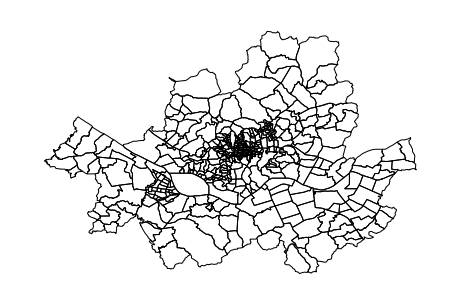

In [85]:
gplt.polyplot(seoul_shape)

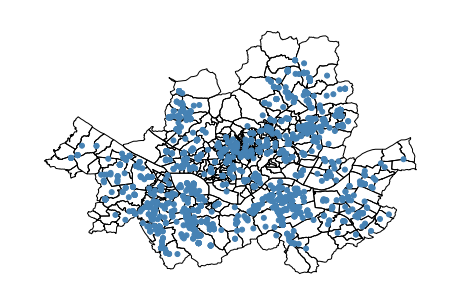

In [86]:
ax = gplt.pointplot(gdf)
gplt.polyplot(seoul_shape, ax=ax)

In [65]:
#Define map bounding-box
BBox = (seoul_p_route.route_longitude.min(), seoul_p_route.route_longitude.max(),      
         seoul_p_route.route_latitude.min(), seoul_p_route.route_latitude.max())
BBox

(126.7944739, 127.169284, 37.450312700000005, 37.6687738)

In [46]:
#geoplot.polyplot(world, figsize=(8, 4))
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)

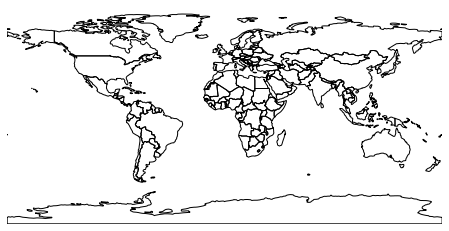

In [47]:
geoplot.polyplot(world, figsize=(8, 4));

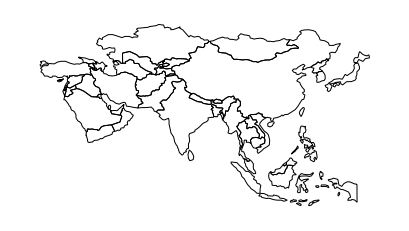

In [49]:
asia = world.query('continent == "Asia"')
geoplot.polyplot(asia, figsize=(8, 4));